<a href="https://colab.research.google.com/github/Nolberto-Rivera/MAT306-EntregablesNRivera/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [26]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



In [27]:
I   = data.loc[data['dataset'] == 'I'  ].drop(columns='dataset')
II  = data.loc[data['dataset'] == 'II' ].drop(columns='dataset')
III = data.loc[data['dataset'] == 'III'].drop(columns='dataset')
IV  = data.loc[data['dataset'] == 'IV' ].drop(columns='dataset')

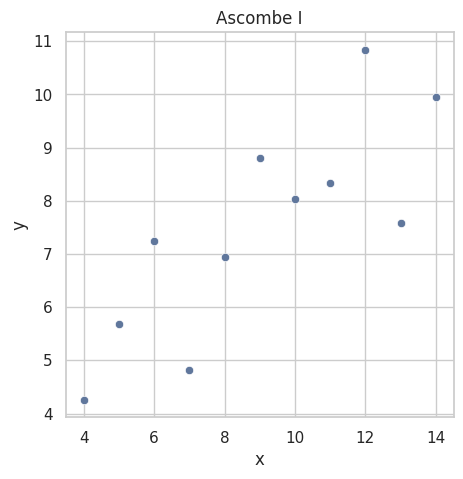

In [28]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=I  , x='x', y='y')
plt.title('Ascombe I'  )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

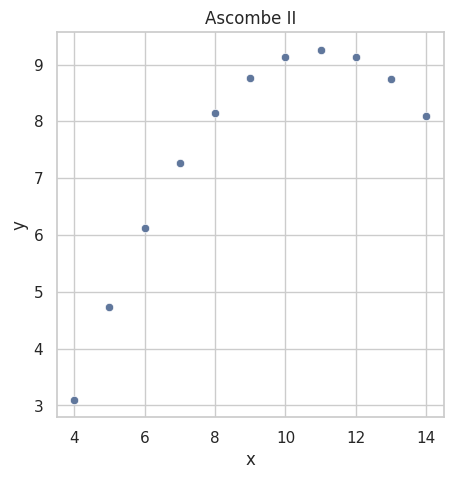

In [29]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=II , x='x', y='y')
plt.title('Ascombe II' )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

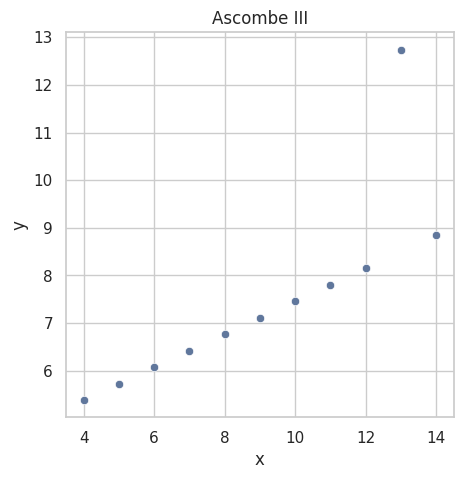

In [30]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=III, x='x', y='y')
plt.title('Ascombe III')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

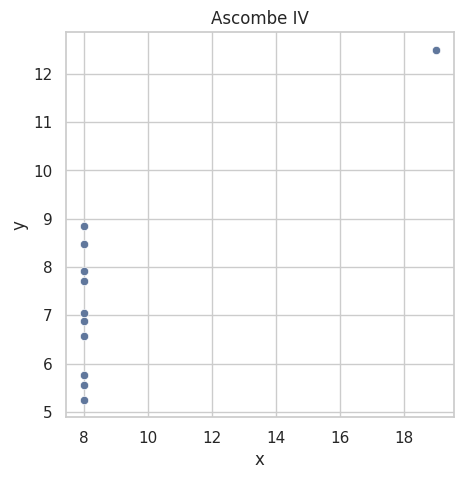

In [31]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=IV , x='x', y='y')
plt.title('Ascombe IV' )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Reproducimos lo indicado más arriba:
* I tiene una tendencia lineal aproximada entre `x` & `y`.
* II tiene una tendencia no lineal que insinúa una curva que abre hacia abajo (segunda derivada negativa).
* Tanto III como IV tienen tendencias lineales (I con una recta de pendiente positiva, IV con una recta vertical) perfecta, salvo por un solo *outlier*.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [32]:
I  .describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [33]:
II .describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [34]:
III.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [35]:
IV .describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


De la información que provee `.describe()`, en los 4 dataframes (que tienen 11 puntos cada uno, no nulos todos estos puntos) tenemos la misma media y desviación estándar, tanto para x como para y; y los primeros 3 dataframes tienen los mismos mínimo y máximo. Los estadísticos que difieren (y son, por tanto, los más informativos, aunque no permiten identificar las tendencias que son intuitivas al apreciar los *scatterplots*) son los cuartiles.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Datos para I  :
* MSE =  1.25115
* R^2 =  0.66654


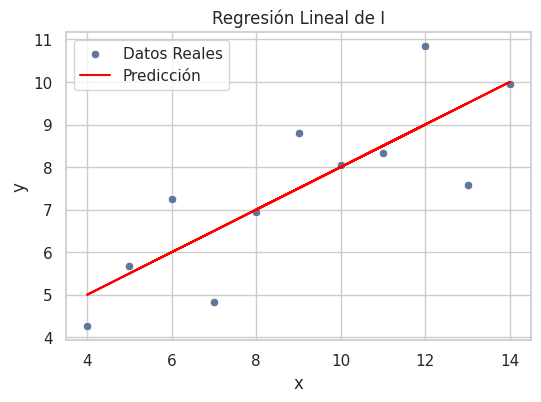

In [44]:
X_I   = I  [['x']]  # Características
y_I   = I   ['y']   # Variable Objetivo

model_I   = LinearRegression()
model_I  .fit(X_I  , y_I  )

y_pred_I   = model_I  .predict(X_I  )

print("Datos para I  :")
print(f"* MSE = {mean_squared_error(y_I  , y_pred_I  ): .5f}")
print(f"* R^2 = {r2_score          (y_I  , y_pred_I  ): .5f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=I , label='Datos Reales')
plt.plot(X_I  , y_pred_I  , color='red', label='Predicción')
plt.title('Regresión Lineal de I'  )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Datos para I  :
* MSE =  1.25239
* R^2 =  0.66624


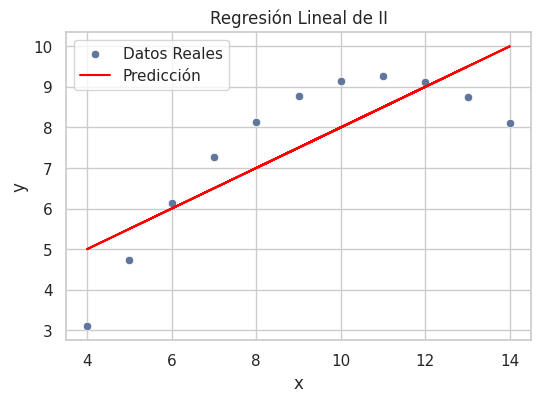

In [43]:
X_II  = II [['x']]  # Características
y_II  = II  ['y']   # Variable Objetivo

model_II  = LinearRegression()
model_II .fit(X_II , y_II )

y_pred_II  = model_II .predict(X_II )

print("Datos para II :")
print(f"* MSE = {mean_squared_error(y_II , y_pred_II ): .5f}")
print(f"* R^2 = {r2_score          (y_II , y_pred_II ): .5f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=II , label='Datos Reales')
plt.plot(X_II , y_pred_II , color='red', label='Predicción')
plt.title('Regresión Lineal de II' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Datos para III:
* MSE =  1.25056
* R^2 =  0.66632


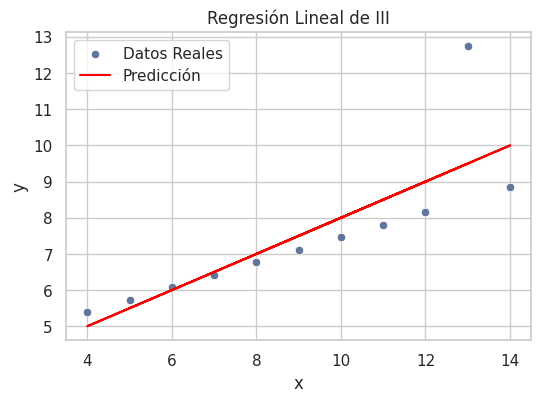

In [45]:
X_III = III[['x']]  # Características
y_III = III ['y']   # Variable Objetivo

model_III = LinearRegression()
model_III.fit(X_III, y_III)

y_pred_III = model_III.predict(X_III)

print("Datos para III:")
print(f"* MSE = {mean_squared_error(y_III, y_pred_III): .5f}")
print(f"* R^2 = {r2_score          (y_III, y_pred_III): .5f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=III, label='Datos Reales')
plt.plot(X_III, y_pred_III, color='red', label='Predicción')
plt.title('Regresión Lineal de III')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Datos para IV :
* MSE =  1.24932
* R^2 =  0.66671


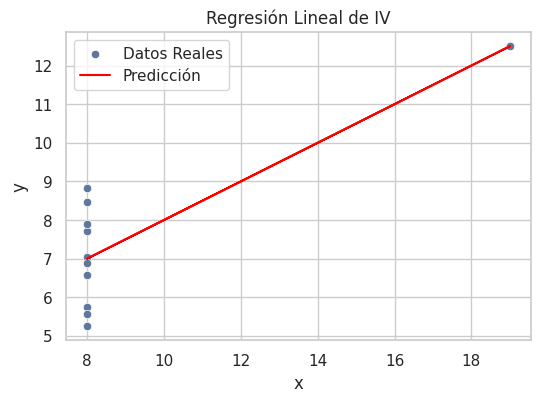

In [46]:
X_IV  = IV [['x']]  # Características
y_IV  = IV  ['y']   # Variable Objetivo

model_IV  = LinearRegression()
model_IV .fit(X_IV , y_IV )

y_pred_IV  = model_IV .predict(X_IV )

print("Datos para IV :")
print(f"* MSE = {mean_squared_error(y_IV , y_pred_IV ): .5f}")
print(f"* R^2 = {r2_score          (y_IV , y_pred_IV ): .5f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=IV , label='Datos Reales')
plt.plot(X_IV , y_pred_IV , color='red', label='Predicción')
plt.title('Regresión Lineal de IV' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Notemos que todas las regresiones tienen **MSE** $ ≈ 1.25$ y $R^2 ≈ 0.67$, aunque discrepan de la centésima en adelante.

Así, estas métricas proveen una medida del error de la predicción (i.e., de *cuánto* dista la predicción de los datos), pero, fuera de aquello, no nos proveen más información sobre los gráficos (i.e., sobre *cómo* dista la predicción de los datos).

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Según los casos antes descritos.
* Para I, se considera adecuado el modelo de regresión lineal (intentando mejorar las métricas se corre el riesgo de sobreajustar).
* Para II, no se considera un modelo de regresión lineal, sino que uno de ajuste polinómico (cuadrático).
* Para III y IV, se eliminan los outliers y se corre nuevamente el modelo de regresión lineal.

Datos para II :
* MSE =  0.00000
* R^2 =  1.00000


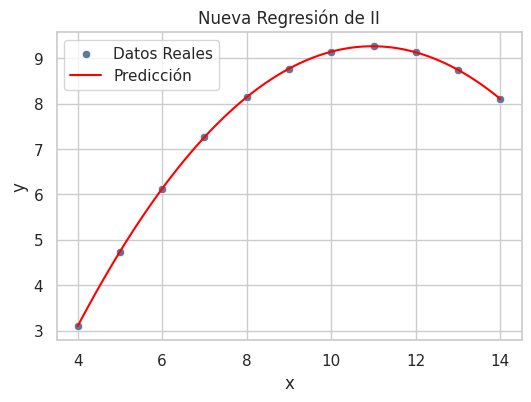

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

X_II  = II [['x']]  # Características
y_II  = II  ['y']   # Variable Objetivo

new_model_II  = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
new_model_II .fit(X_II, y_II)

new_y_pred_II  = new_model_II .predict(X_II)

print("Datos para II :")
print(f"* MSE = {mean_squared_error(y_II , new_y_pred_II ): .5f}")
print(f"* R^2 = {r2_score          (y_II , new_y_pred_II ): .5f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=II , label='Datos Reales')

# Se grafica la línea predicha proveyendo suficientes puntos en el eje x para tener una curva suave
ejeX = pd.DataFrame({'x': np.linspace(X_II['x'].min(), X_II['x'].max(), 100)})
ejeY = new_model_II.predict(ejeX)
plt.plot(ejeX['x'], ejeY, color='red', label='Predicción')

plt.title('Nueva Regresión de II' )
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Datos para new_III:
* MSE =  0.00001
* R^2 =  0.99999


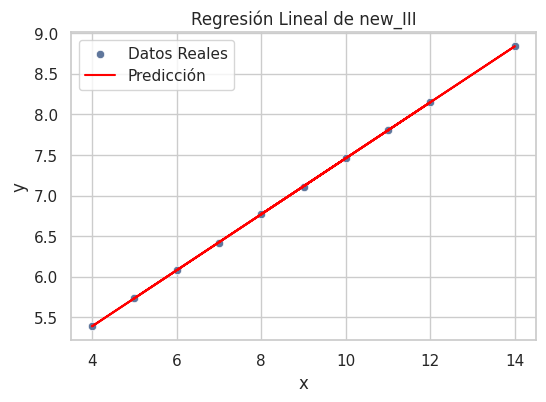

In [64]:
new_III = III.loc[III['x'] != 13]

new_X_III = new_III[['x']]  # Características
new_y_III = new_III ['y']   # Variable Objetivo

new_model_III = LinearRegression()
new_model_III.fit(new_X_III, new_y_III)

new_y_pred_III = new_model_III.predict(new_X_III)

print("Datos para new_III:")
print(f"* MSE = {mean_squared_error(new_y_III, new_y_pred_III): .5f}")
print(f"* R^2 = {r2_score          (new_y_III, new_y_pred_III): .5f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=new_III, label='Datos Reales')
plt.plot(new_X_III, new_y_pred_III, color='red', label='Predicción')
plt.title('Regresión Lineal de new_III')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Datos para new_IV :
* MSE =  1.37425
* R^2 =  0.00000


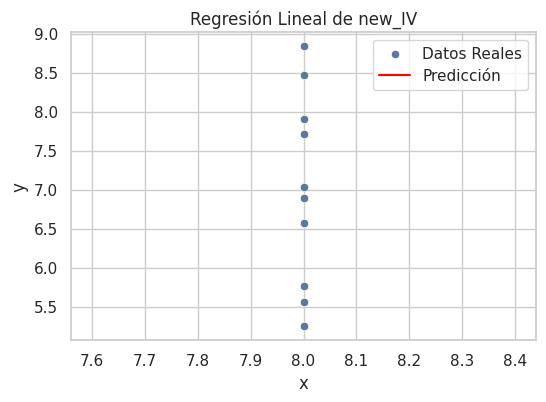

In [66]:
new_IV  = IV .loc[IV ['x'] != 19]

new_X_IV  = new_IV [['x']]  # Características
new_y_IV  = new_IV  ['y']   # Variable Objetivo

new_model_IV  = LinearRegression()
new_model_IV .fit(new_X_IV , new_y_IV )

new_y_pred_IV  = new_model_IV .predict(new_X_IV )

print("Datos para new_IV :")
print(f"* MSE = {mean_squared_error(new_y_IV , new_y_pred_IV ): .5f}")
print(f"* R^2 = {r2_score          (new_y_IV , new_y_pred_IV ): .5f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=new_IV , label='Datos Reales')
plt.plot(new_X_IV , new_y_pred_IV , color='red', label='Predicción')
plt.title('Regresión Lineal de new_IV' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()